# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Reading the Dataset

In [2]:
data = pd.read_csv("CO2 Emissions_Canada.csv")

# Exploring the Dataset

In [3]:
data.head()

,Make,VehicleClass,EngineSize(L),Cylinders,Transmission,FuelType,FuelConsumptionCity(L/100 km),FuelConsumptionHwy(L/100 km),FuelConsumptionComb(L/100 km),FuelConsumptionComb(mpg),CO2Emissions(g/km)
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.describe()

,EngineSize(L),Cylinders,FuelConsumptionCity(L/100 km),FuelConsumptionHwy(L/100 km),FuelConsumptionComb(L/100 km),FuelConsumptionComb(mpg),CO2Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


# Finding Missing Values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Make                           7385 non-null   object 
 1   VehicleClass                   7385 non-null   object 
 2   EngineSize(L)                  7385 non-null   float64
 3   Cylinders                      7385 non-null   int64  
 4   Transmission                   7385 non-null   object 
 5   FuelType                       7385 non-null   object 
 6   FuelConsumptionCity(L/100 km)  7385 non-null   float64
 7   FuelConsumptionHwy(L/100 km)   7385 non-null   float64
 8   FuelConsumptionComb(L/100 km)  7385 non-null   float64
 9   FuelConsumptionComb(mpg)       7385 non-null   int64  
 10  CO2Emissions(g/km)             7385 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 634.8+ KB


# Encoding the Categorical Attributes of the dataset

In [6]:
data['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [7]:
# Replacing similar labels with a single label
data['Transmission'] = np.where(data['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),"Automatic",data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]),"Automated Manual",data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]),"Automatic with Select Shift",data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(["AV", "AV6", "AV7", "AV8", "AV10"]),"Continuously Variable",data['Transmission'])
data['Transmission'] = np.where(data['Transmission'].isin(["M5", "M6", "M7"]),"Manual",data['Transmission'])

In [8]:
data['Transmission'].unique()

array(['Automatic with Select Shift', 'Manual', 'Continuously Variable',
       'Automated Manual', 'Automatic'], dtype=object)

In [9]:
Trans = pd.get_dummies(data['Transmission'],drop_first=True)
data = data.drop(['Transmission'],axis=1)
data = pd.concat([data,Trans],axis=1)

In [10]:
data_with_dummis = data.copy()
data_to_dummis = ['Make','VehicleClass','FuelType']
perfix_for_data = ['Make','Cls','Fuel']
for col, per in zip(data_to_dummis, perfix_for_data):
    dummi = pd.get_dummies(data_with_dummis[col], prefix=per, drop_first=True)
    data_with_dummis = data_with_dummis.join(dummi)
    
labels = data_with_dummis['CO2Emissions(g/km)']

data_to_drop = data_to_dummis

data_to_drop

['Make', 'VehicleClass', 'FuelType']

In [11]:
final_data = data_with_dummis.drop(data_to_drop, axis=1)
final_data.head()

,EngineSize(L),Cylinders,FuelConsumptionCity(L/100 km),FuelConsumptionHwy(L/100 km),FuelConsumptionComb(L/100 km),FuelConsumptionComb(mpg),CO2Emissions(g/km),Automatic,Automatic with Select Shift,Continuously Variable,...,Cls_SUBCOMPACT,Cls_SUV - SMALL,Cls_SUV - STANDARD,Cls_TWO-SEATER,Cls_VAN - CARGO,Cls_VAN - PASSENGER,Fuel_E,Fuel_N,Fuel_X,Fuel_Z
0,2.0,4,9.9,6.7,8.5,33,196,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [12]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EngineSize(L)                  7385 non-null   float64
 1   Cylinders                      7385 non-null   int64  
 2   FuelConsumptionCity(L/100 km)  7385 non-null   float64
 3   FuelConsumptionHwy(L/100 km)   7385 non-null   float64
 4   FuelConsumptionComb(L/100 km)  7385 non-null   float64
 5   FuelConsumptionComb(mpg)       7385 non-null   int64  
 6   CO2Emissions(g/km)             7385 non-null   int64  
 7   Automatic                      7385 non-null   uint8  
 8   Automatic with Select Shift    7385 non-null   uint8  
 9   Continuously Variable          7385 non-null   uint8  
 10  Manual                         7385 non-null   uint8  
 11  Make_ALFA ROMEO                7385 non-null   uint8  
 12  Make_ASTON MARTIN              7385 non-null   u

# Visualizing the data

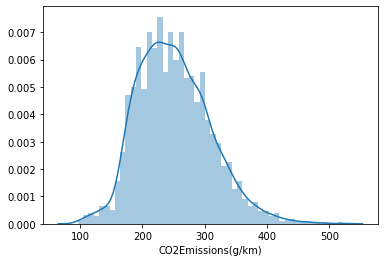

In [49]:
# Plot to find the CO2 levels
sns.distplot(data['CO2Emissions(g/km)'])

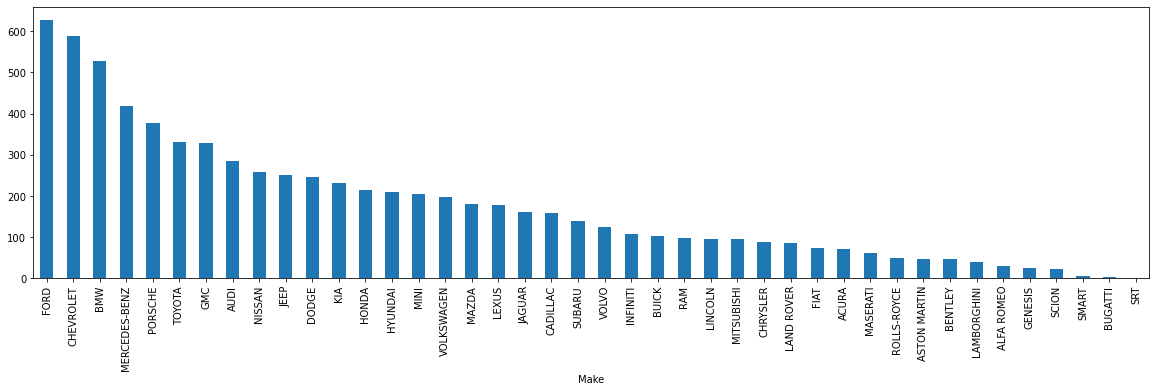

In [50]:
# Finding which car make is the most dominant one
plt.figure(figsize=(20,5))
data.groupby(['Make'])['Make'].count().sort_values(ascending=False).plot(kind='bar')

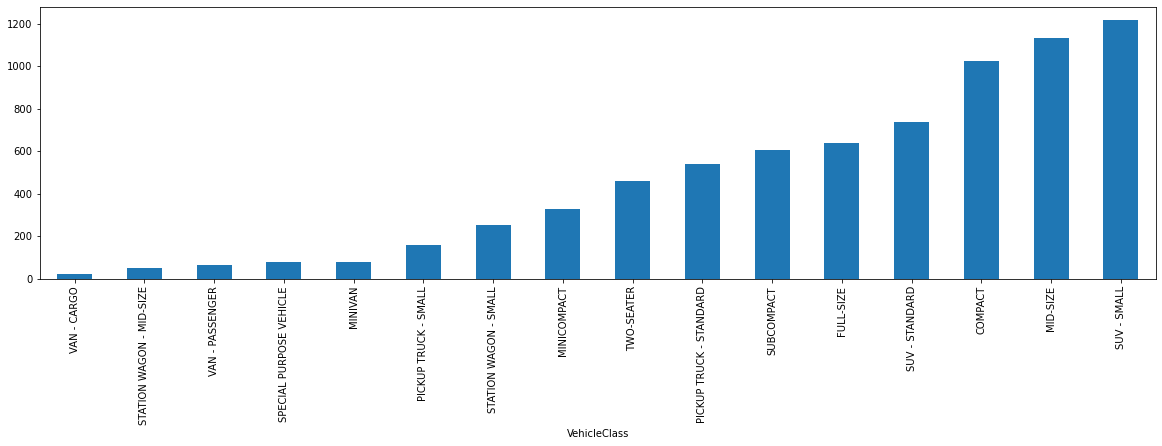

In [51]:
# Finding the most used vehicle type
plt.figure(figsize=(20,5))
data.groupby(['VehicleClass'])['VehicleClass'].count().sort_values(ascending=True).plot(kind='bar')


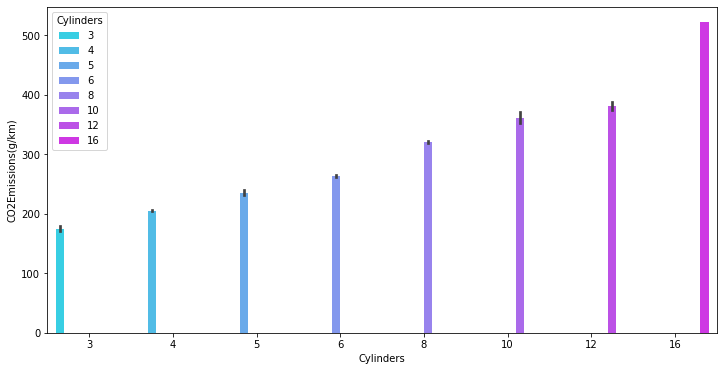

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Cylinders', y = 'CO2Emissions(g/km)',hue='Cylinders', data=data, palette='cool')
plt.show()

# Correlation

In [53]:
data.corr()

,EngineSize(L),Cylinders,FuelConsumptionCity(L/100 km),FuelConsumptionHwy(L/100 km),FuelConsumptionComb(L/100 km),FuelConsumptionComb(mpg),CO2Emissions(g/km),Automatic,Automatic with Select Shift,Continuously Variable,Manual
EngineSize(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145,0.294758,0.003070,-0.196299,-0.194094
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644,0.214928,0.038046,-0.203080,-0.189454
FuelConsumptionCity(L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592,0.310003,0.045619,-0.331367,-0.164182
FuelConsumptionHwy(L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536,0.307657,0.026168,-0.253580,-0.192107
FuelConsumptionComb(L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052,0.313305,0.038493,-0.308181,-0.175614
FuelConsumptionComb(mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426,-0.299017,-0.096227,0.395611,0.157454
CO2Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000,0.267254,0.070422,-0.329452,-0.166170
Automatic,0.294758,0.214928,0.310003,0.307657,0.313305,-0.299017,0.267254,1.000000,-0.495615,-0.168211,-0.252841
Automatic with Select Shift,0.003070,0.038046,0.045619,0.026168,0.038493,-0.096227,0.070422,-0.495615,1.000000,-0.249247,-0.374649
Continuously Variable,-0.196299,-0.203080,-0.331367,-0.253580,-0.308181,0.395611,-0.329452,-0.168211,-0.249247,1.000000,-0.127155


# Correlation Heatmap

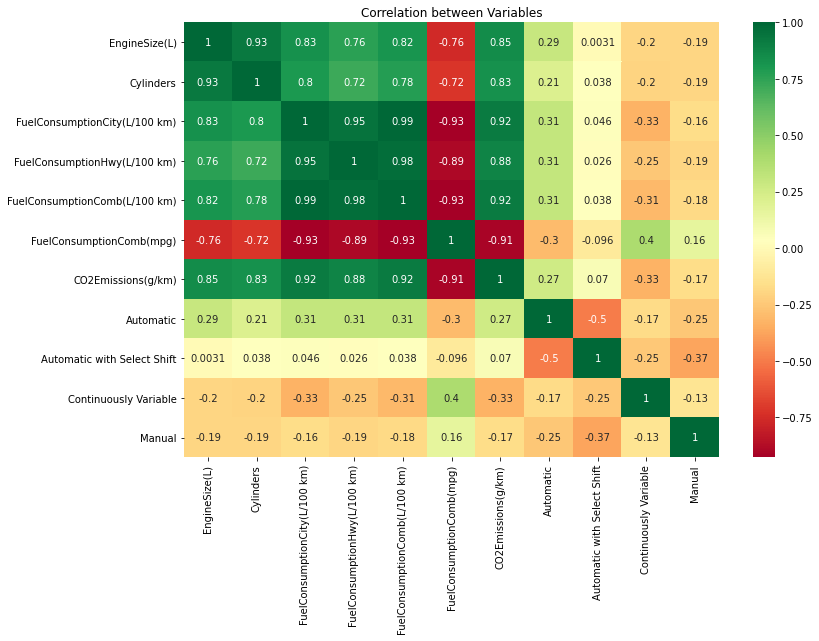

In [54]:
#Heatmap to see correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

# Splitting the data into X and y

In [13]:
X = final_data.drop(["CO2Emissions(g/km)"], axis =1)
y = final_data['CO2Emissions(g/km)']

In [14]:
X.head()

,EngineSize(L),Cylinders,FuelConsumptionCity(L/100 km),FuelConsumptionHwy(L/100 km),FuelConsumptionComb(L/100 km),FuelConsumptionComb(mpg),Automatic,Automatic with Select Shift,Continuously Variable,Manual,...,Cls_SUBCOMPACT,Cls_SUV - SMALL,Cls_SUV - STANDARD,Cls_TWO-SEATER,Cls_VAN - CARGO,Cls_VAN - PASSENGER,Fuel_E,Fuel_N,Fuel_X,Fuel_Z
0,2.0,4,9.9,6.7,8.5,33,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [15]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2Emissions(g/km), dtype: int64

In [16]:
#backward feature elimination
import statsmodels.api as sm
X2 = sm.add_constant(X)
ols = sm.OLS(y,X2)
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     CO2Emissions(g/km)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.630e+04
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:27:25   Log-Likelihood:                -21860.
No. Observations:                7385   AIC:                         4.386e+04
Df Residuals:                    7314   BIC:                         4.435e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [17]:
while(lr.pvalues.max()>0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True)
    ols = sm.OLS(y,X2)
    lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     CO2Emissions(g/km)   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.426e+04
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:27:26   Log-Likelihood:                -21874.
No. Observations:                7385   AIC:                         4.384e+04
Df Residuals:                    7337   BIC:                         4.418e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [18]:
X2.head()

,const,EngineSize(L),Cylinders,FuelConsumptionCity(L/100 km),FuelConsumptionHwy(L/100 km),FuelConsumptionComb(L/100 km),FuelConsumptionComb(mpg),Automatic,Automatic with Select Shift,Manual,...,Cls_PICKUP TRUCK - STANDARD,Cls_SPECIAL PURPOSE VEHICLE,Cls_SUBCOMPACT,Cls_SUV - STANDARD,Cls_VAN - CARGO,Cls_VAN - PASSENGER,Fuel_E,Fuel_N,Fuel_X,Fuel_Z
0,1.0,2.0,4,9.9,6.7,8.5,33,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,2.4,4,11.2,7.7,9.6,29,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1.0,1.5,4,6.0,5.8,5.9,48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,3.5,6,12.7,9.1,11.1,25,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,3.5,6,12.1,8.7,10.6,27,0,1,0,...,0,0,0,0,0,0,0,0,0,1


# Splitting the data into training and Testing

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size = 0.2,random_state=101)

# Standardization of the data

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [21]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Model Building

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
params = {
            'fit_intercept':[True,False], 
            'normalize':[True,False], 
            'copy_X':[True, False]}

lrm = GridSearchCV(estimator = model,param_grid = params, cv=5)

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),X2,y,cv=5).mean()

0.9912998595828526

In [25]:
lrm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [26]:
lrm.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [27]:
lrm.best_score_

0.9935089987945259

In [28]:
lrm.score(X_test_scaled,y_test)

0.9905644278209543

In [29]:
lrm.score(X_train_scaled,y_train)

0.9937178075154645

In [30]:
y_pred = lrm.predict(X_test_scaled)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(r2_score(y_test,y_pred)) # R^2
print(mean_squared_error(y_test,y_pred)) #MSE
print(math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE

0.9905644278209543
31.53070249833977
5.615220609943991


In [31]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables
n = X_test.shape[0]
p = X_test.shape[1]


Adj_r2=1-(1-0.9905644278209543)*(n-1)/(n-p-1)
print(Adj_r2)

0.9902472657309024


# KNN Model

In [32]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
params = {  'n_neighbors':[5,10,15,20,25],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size':[10,20,30,40,50],
            'metric': ['euclidean', 'manhattan', 'minkowski']
         }

kn = GridSearchCV(estimator=knn, param_grid=params, cv=5)

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X2,y,cv=5).mean()

0.9859396495085806

In [68]:
kn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [5, 10, 15, 20, 25],
                         'weights': ['uniform', 'distance']})

In [77]:
kn.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 10,
 'metric': 'manhattan',
 'n_neighbors': 5,
 'weights': 'distance'}

In [78]:
kn.best_score_

0.9827187347583346

In [79]:
kn.score(X_test_scaled,y_test)

0.9869259431496133

In [80]:
kn.score(X_train_scaled,y_train)

0.9996431352395955

In [186]:
y_pred = kn.predict(X_test_scaled)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(r2_score(y_test,y_pred)) # R^2
print(mean_squared_error(y_test,y_pred)) #MSE
print(math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE

0.9869259431496133
43.68936924794039
6.609793434589344


In [187]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]


Adj_r2=1-(1-0.9869259431496133)*(n-1)/(n-p-1)
print(Adj_r2)

0.986486479053802


# SVR Model

In [35]:
from sklearn.svm import SVR
model = SVR()
params = {        
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [2,3],
            'gamma' : [0.03, 0.3, 1],
             }
svr = GridSearchCV(estimator=model, param_grid=params, cv=5)


In [36]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVR(),X2,y,cv=5).mean()

0.8825932702433461

In [38]:
svr.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'degree': [2, 3], 'gamma': [0.03, 0.3, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [39]:
svr.best_params_

{'degree': 3, 'gamma': 1, 'kernel': 'poly'}

In [40]:
svr.best_score_

0.9936676012496791

In [41]:
svr.score(X_test_scaled,y_test)

0.9949816144963228

In [42]:
svr.score(X_train_scaled,y_train)

0.995186841922924

In [43]:
y_pred = svr.predict(X_test_scaled)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(r2_score(y_test,y_pred)) # R^2
print(mean_squared_error(y_test,y_pred)) #MSE
print(math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE

0.9949816144963228
16.769859562923813
4.0951018989670835


In [179]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]


Adj_r2=1-(1-0.9949816144963228)*(n-1)/(n-p-1)
print(Adj_r2)

0.9948129292693084


# Decision Tree Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
params = {          
            'splitter':['best', 'random'],
             'max_depth':[2,4,6,8],
            'max_features':['auto', 'sqrt', 'log2']
          }
dtr = GridSearchCV(estimator=model, param_grid=params, cv=5)



In [161]:
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeRegressor(),X2,y,cv=5).mean()

0.9924489611181052

In [45]:
dtr.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [46]:
dtr.best_params_

{'max_depth': 8, 'max_features': 'auto', 'splitter': 'best'}

In [47]:
dtr.best_score_

0.9932759897676048

In [48]:
dtr.score(X_test_scaled,y_test)

0.9930147861345524

In [49]:
dtr.score(X_train_scaled,y_train)

0.9964072366141018

In [50]:
y_pred = dtr.predict(X_test_scaled)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(r2_score(y_test,y_pred)) # R^2
print(mean_squared_error(y_test,y_pred)) #MSE
print(math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE

0.9930147861345524
23.342378829747073
4.831395122503134


In [51]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]


Adj_r2=1-(1-0.994263709167482)*(n-1)/(n-p-1)
print(Adj_r2)

0.9940708926689099


# Random Forest Regressor Model

In [52]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
params = {
            'n_estimators':[20,40,60,80,100],
            'max_depth':[2,4,6,8],
            'max_features':['auto','sqrt','log2']
        }
rfr = GridSearchCV(estimator=model, param_grid=params, cv=5)


In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(),X2,y,cv=5).mean()

0.9948407256706695

In [54]:
rfr.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 40, 60, 80, 100]})

In [55]:
rfr.best_params_

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}

In [56]:
rfr.best_score_

0.9950540342773166

In [57]:
rfr.score(X_test_scaled,y_test)

0.9947577398352216

In [58]:
rfr.score(X_train_scaled,y_train)

0.9970678931561106

In [59]:
y_pred = rfr.predict(X_test_scaled)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(r2_score(y_test,y_pred)) # R^2
print(mean_squared_error(y_test,y_pred)) #MSE
print(math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE

0.9947577398352216
17.517977981409793
4.185448360858104


In [60]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]


Adj_r2=1-(1-0.9947492966482069)*(n-1)/(n-p-1)
print(Adj_r2)

0.9945728024178945


# AdaBoost Model

In [61]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

params = {'base_estimator': [DecisionTreeRegressor(max_depth=1),
                            DecisionTreeRegressor(max_depth=5),
                            DecisionTreeRegressor(max_depth=10)],
           'n_estimators':[20,40,60,80,100]
         }
ada = GridSearchCV(AdaBoostRegressor(),param_grid=params,cv=5)


In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score(AdaBoostRegressor(),X2,y,cv=5).mean()

0.9366903520069332

In [63]:
ada.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=1),
                                            DecisionTreeRegressor(max_depth=5),
                                            DecisionTreeRegressor(max_depth=10)],
                         'n_estimators': [20, 40, 60, 80, 100]})

In [64]:
ada.best_params_

{'base_estimator': DecisionTreeRegressor(max_depth=10), 'n_estimators': 100}

In [65]:
ada.best_score_

0.9970197797257706

In [66]:
ada.score(X_test_scaled,y_test)

0.9950961843327012

In [67]:
ada.score(X_train_scaled,y_train)

0.9985866189751552

In [150]:
y_pred = ada.predict(X_test_scaled)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(r2_score(y_test,y_pred)) # R^2
print(mean_squared_error(y_test,y_pred)) #MSE
print(math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE

0.9950116751992586
16.669406186787857
4.0828184121741025


In [170]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables
n = X_test_scaled.shape[0]
p = X_test_scaled.shape[1]


Adj_r2=1-(1-0.9950116751992586)*(n-1)/(n-p-1)
print(Adj_r2)

0.9948440004160404


# Combined code for Hyper Parameter Tuning in all the models Together

In [189]:
model_param = {
    'LinearRegression' : {
        'model': LinearRegression(),
        'param':{
            'fit_intercept':[True,False], 
            'normalize':[True,False], 
            'copy_X':[True, False]
        }
       
    },
    
    'KNeighborsRegressor':{
        'model':KNeighborsRegressor(),
        'param':{
            'n_neighbors': [5,10,15,20,25],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size':[10,20,30,40,50]
        }
    },
    
     'SVR':{
        'model':SVR(),
        'param':{        
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [2,3],
            'gamma' : [0.03, 0.3, 1],
             }
         
      },
          
      'DecisionTreeRegressor':{
        'model':DecisionTreeRegressor(),
        'param':{          
            'splitter':['best', 'random'],
             'max_depth':[2,4,6,8],
            'max_features':['auto', 'sqrt', 'log2']
          }
    },
            
    'RandomForestRegressor':{
        'model' : RandomForestRegressor(),
        'param': {
            'n_estimators':[20,40,60,80,100],
            'max_depth':[2,4,6,8],
            'max_features':['auto','sqrt','log2']
        }
    },
    
    'AdaBoostRegressor' :{
        'model': AdaBoostRegressor(),
        'param': {
            'base_estimator': [DecisionTreeRegressor(max_depth=1),
                            DecisionTreeRegressor(max_depth=5),
                            DecisionTreeRegressor(max_depth=10)],
           'n_estimators':[20,40,60,80,100]
             }
        }   

    }

In [191]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X_train_scaled,y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [192]:
data_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
pd.set_option('display.max_colwidth', -1)
data_model_score

,model,best_score,best_params
0,LinearRegression,0.993509,"{'copy_X': True, 'fit_intercept': True, 'normalize': False}"
1,KNeighborsRegressor,0.973657,"{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 5, 'weights': 'distance'}"
2,SVR,0.993668,"{'degree': 3, 'gamma': 1, 'kernel': 'poly'}"
3,DecisionTreeRegressor,0.993064,"{'max_depth': 8, 'max_features': 'auto', 'splitter': 'best'}"
4,RandomForestRegressor,0.995052,"{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 60}"
5,AdaBoostRegressor,0.997000,"{'base_estimator': DecisionTreeRegressor(max_depth=10), 'n_estimators': 60}"
